<a href="https://colab.research.google.com/github/AhmadAghaebrahimian/Optimization/blob/main/GradientDescent/GD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this excercise, we implement Gradient Decent for a simple one variable function. Let's assume that we want to minimize the function $f(x) = \theta x + b$. This is a simple linear model where $\theta$ is the slope and $b$ is the y-intercept. To optimize (minimize/mazimize) $f(x)$, we need to find optimum $\theta$ and $b$ which from now on are called the parameters and the bias respectively. Since $x$ can be multidimentional, $\theta$ can also be multidimesional, i.e., one parameter for each dimension of $x$. For the sake of simplicity though, we assume $x$ hence $\theta$ are one dimention in this excercise. We also ignore bias for now. In the next excercise, we examine Gradient Descent for multidimensional optimization. So, let'se optimize $f(x) = \theta x$.

Let's import dependencies first.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

We need some training data which consists of a set of tuples $(x_i, y_i)$.

Let's generate some hypothetical training data.


In [ ]:
np.random.seed(31) # Ensure replicability; Randomely generated numbers stay the same in different runs
X = 2 * np.random.rand(10000, 1)  # one dimensional Xs
y = 3 * X + np.random.randn(10000, 1)  # Assumng we know the correct parameter so that we can generate ground truths plus a little bit of noise
print ("First instance of training data: (%d, %d)"%(X[0], y[0]))

$x_i$ is the independent and $y_i$ is the dependent variables. $y_i$ is ground truth while $\hat y$ is the predicted value by the model (or hypothesis) $(\hat y = h(x) = \theta x)$. We will find $\theta$ so that the sum of all errors $(\sum (\hat y - y))$ becoma as small as possible. This is called loss (or objective) function. To make it more mathematically elegant, let's square the error and average it all (hense the well-know loss function; Mean of Square Errors, MSE).

$\ell (\theta) = \frac{1}{m} \sum_{i=1}^m {(\hat y - y)}^2$

Gradient Descent uses the derivative of $\ell (\theta)$ with respect to each $\theta$ (i.e. gradients) to find the direction of the next move towards the optima. Here it is the Gradient Descent update rule:

$\theta_{new} := \theta_{old} - \alpha \nabla \ell(\theta)$ which is the same as:

$\theta_{j\_new} := \theta_{j\_old} - \alpha x^i_j (\hat{y}^i - y^i)$ which is the same as:

$\theta_{j\_new} := \theta_{j\_old} - \alpha x^i_j(\theta x - y^i)$

Knowing all of this, let's implement the gradient descent function:


In [5]:
def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(1, 1)  # Initially assign random values to theta
    loss_history = [] # save the loss history to visualize learning curve

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients # parameters updated
        loss = np.mean((X.dot(theta) - y)**2) # compute loss with new parameters
        loss_history.append(loss)

    return theta, loss_history

The Gradient step is ready. But first, it requires two hyperparameters to run.

In contrast to parameters which are tuned on training data, hyperparamerts are tuned on validation data to fine-tune the optimization procedure. Here we have two hyperparameters; learning rate and number of iteration. Learning rate determines how big the jump toward the optima should be taken after the we recognize the direction of the jump. Too big jumps make too large strides which lead to divergence. Too small jump makes it too long to reach the optima.

The second hyper parameter is the number of iterations, which dictates how many times the entire training data should be passed to Gradient Descent until it converges.

Convergence is the point where the loss does not reduces anymore, which signals the model does not learn anymore, eaither. It can be checked by computing the difference between previous and current loss in each iteratin.

Let's implement these concepts before running the optimization step:

In [11]:
learning_rate = 0.1
n_iterations = 20

Now everything is in place. Let's run the code and see how it works by visualzing its loss curve.

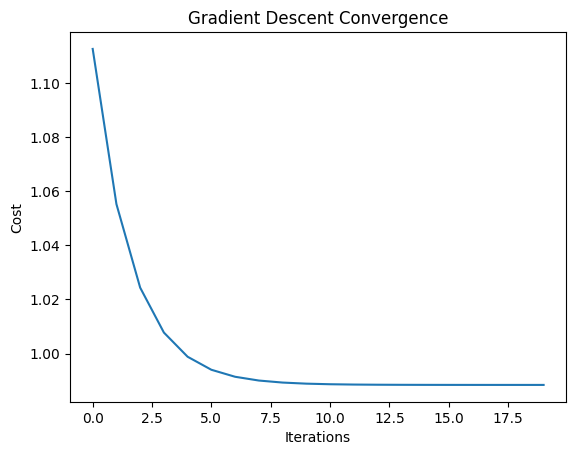

Theta found by Gradient Descent: [3.01969906]


In [12]:
theta_best, loss_history = gradient_descent(X, y, learning_rate, n_iterations)

plt.plot(range(n_iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.show()
#
print("Theta found by Gradient Descent:", theta_best.ravel())

Optional Excercise 1: Compare the development and training loss and argue if this is over-fit or under-fit

Optional Excercise 2: Scale the features and run again. Notice any difference?

Optional Excercise 3: Assess the impact of too small/big learing rate along number of iteration

Optional Excercise 4: Assess the impact of other type of initialization (all ones, all zeros, random number with different SD) on learning curve  